## Observations and Insights 

As time progresses, Capomulin reduces the size of a tumor dramatically.  

There is a strong, positive correlation between the weight of Capomulin and the tumor volume, with the correlation = 0.84. 

We can see that tumor volumes decrease much better with the use of both Capomulin and Ramicane. 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
mice = all_data['Mouse ID'].value_counts()
number_mice = len(mice)
print(number_mice)

249


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID 
# and Timepoint. 
duplicate_mice = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = all_data[all_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice = clean_df['Mouse ID'].value_counts()
number_clean_mice = len(clean_df_mice)
print(number_clean_mice)

248


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# table
drug_mean
drug_median
drug_variance
drug_std
drug_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [31]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics 
# in a single line

summary_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_variance,
    "Standard Deviation": drug_std,
    "SEM": drug_sem
})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

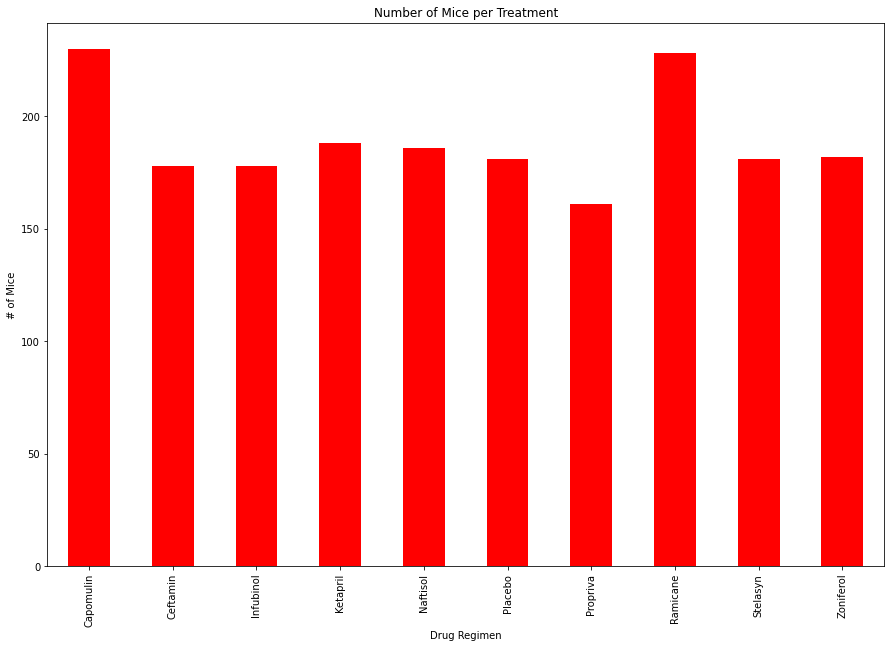

In [40]:
# Generate a bar plot showing the total number of timepoints for 
# all mice tested for each drug regimen using Pandas.

mice_by_time = all_data.groupby(['Drug Regimen']).count()['Mouse ID']

pandas_bar = mice_by_time.plot.bar(figsize = (15,10), color = 'red')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.title("Number of Mice per Treatment")


plt.show()

Text(0, 0.5, 'Number of Mice')

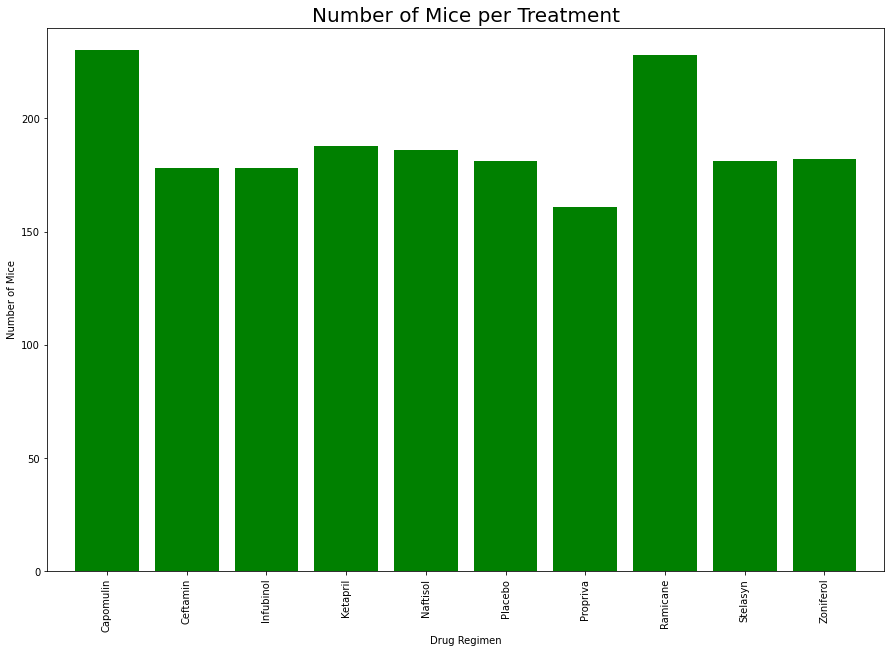

In [51]:
# Generate a bar plot showing the total number of timepoints for 
# all mice tested for each drug regimen using pyplot.
mice_list =(all_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_by_time))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='green', align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


In [59]:
# Generate a pie plot showing the distribution of female versus male 
# mice using Pandas

gender_groups = all_data.groupby(['Mouse ID', 'Sex'])
gender_df = pd.DataFrame(gender_groups.size())

mouse_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["% of Sex"] = (mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()*100)

mouse_gender

,Total Count,% of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


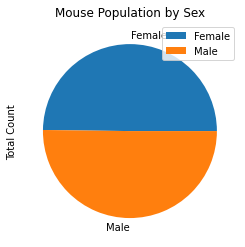

In [61]:
mouse_gender.plot.pie(y='Total Count')
plt.title("Mouse Population by Sex")
plt.show()

Text(0.5, 1.0, 'Mouse Population by Sex')

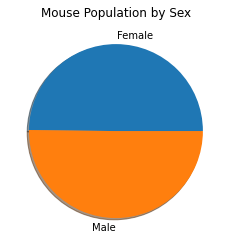

In [63]:
# Generate a pie plot showing the distribution of female versus male 
# mice using pyplot

labels = ["Female", "Male"]
amounts = [49.799197, 50.200803]

plt.pie(amounts, labels=labels, shadow = True)
plt.title("Mouse Population by Sex")

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the 
# treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor 
# volume at the last timepoint


In [73]:
# Capomulin
capo_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capo_volume = pd.DataFrame(capo_last)
capo_merge = pd.merge(capo_volume, clean_df, how="left", on=("Mouse ID", "Timepoint"))
capo_merge.head()

capo_tumors = capo_merge["Tumor Volume (mm3)"]
quartiles = capo_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile of Capomulin tumors: {lower_q}")
print(f"The upper quartile of Capomulin tumors: {upper_q}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# for outliers: 
lower_bound = lower_q - (iqr*1.5)
upper_bound = upper_q + (iqr*1.5)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [75]:
# Ramicane
rami_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
rami_volume = pd.DataFrame(rami_last)
rami_merge = pd.merge(rami_volume, clean_df, how="left", on=("Mouse ID", "Timepoint"))
rami_merge.head()

rami_tumors = rami_merge["Tumor Volume (mm3)"]
quartiles = rami_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile of Ramicane tumors: {lower_q}")
print(f"The upper quartile of Ramicane tumors: {upper_q}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

# for outliers: 
lower_bound = lower_q - (iqr*1.5)
upper_bound = upper_q + (iqr*1.5)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [76]:
# Infubinol
infu_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infu_volume = pd.DataFrame(infu_last)
infu_merge = pd.merge(infu_volume, clean_df, how="left", on=("Mouse ID", "Timepoint"))
infu_merge.head()

infu_tumors = infu_merge["Tumor Volume (mm3)"]
quartiles = infu_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile of Infubinol tumors: {lower_q}")
print(f"The upper quartile of Infubinol tumors: {upper_q}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

# for outliers: 
lower_bound = lower_q - (iqr*1.5)
upper_bound = upper_q + (iqr*1.5)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [77]:
# Ceftamin
ceft_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceft_volume = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_volume, clean_df, how="left", on=("Mouse ID", "Timepoint"))
ceft_merge.head()

ceft_tumors = ceft_merge["Tumor Volume (mm3)"]
quartiles = ceft_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

print(f"The lower quartile of Ceftamin tumors: {lower_q}")
print(f"The upper quartile of Ceftamin tumors: {upper_q}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

# for outliers: 
lower_bound = lower_q - (iqr*1.5)
upper_bound = upper_q + (iqr*1.5)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


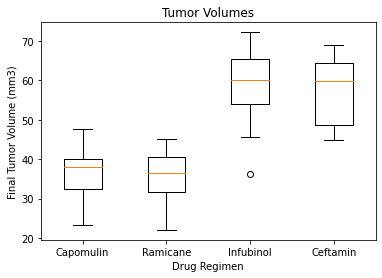

In [82]:
# Generate a box plot of the final tumor volume of each mouse 
# across four regimens of interest

plot_data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=regimen)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

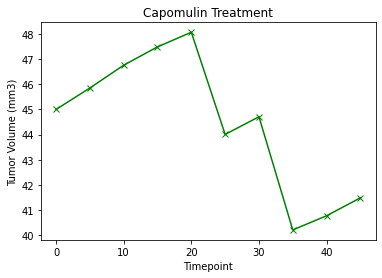

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse 
# treated with Capomulin

line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis, color='green', marker='x')
plt.title("Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

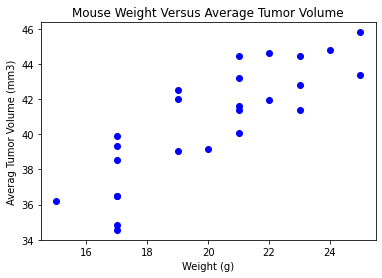

In [91]:
# Generate a scatter plot of average tumor volume vs. 
# mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [93]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor is {correlation}")

The correlation between mouse weight and the average tumor is (0.841936342469472, 1.3225722434712483e-07)


Text(0.5, 1.0, 'Weight vs Tumor Volume for Capomulin')

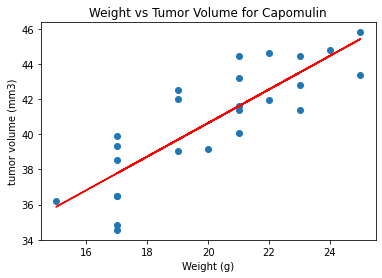

In [99]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
plt.plot(avg_capo_vol['Weight (g)'], regress_values, color='red')
plt.ylabel("tumor volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Weight vs Tumor Volume for Capomulin")